In [ ]:
import os

train_dirs = os.listdir('../input/waveform-inversion/train_samples/')
print('num of train dirs:')
print(train_dirs)
print(len(train_dirs))
test_files = os.listdir('../input/waveform-inversion/test/')
print('num of test files:')
print(len(test_files))

num of train dirs:
['CurveFault_A', 'CurveFault_B', 'CurveVel_A', 'CurveVel_B', 'FlatFault_A', 'FlatFault_B', 'FlatVel_A', 'FlatVel_B', 'Style_A', 'Style_B']
10
num of test files:
65818


In [ ]:
train_path = '../input/waveform-inversion/train_samples/'
count = 0

for root, dirs, files in os.walk(train_path):
    count += len(files)

print(f'num of train files: {count}')

num of train files: 40


In [ ]:
from pathlib import Path

def print_tree(path: Path, indent=''):
    print(indent + path.name + '/')
    for item in sorted(path.iterdir()):
        if item.is_dir():
            print_tree(item, indent + '    ')
        else:
            print(indent + '    ' + item.name)

print_tree(Path(train_path))

train_samples/
    CurveFault_A/
        seis2_1_0.npy
        seis4_1_0.npy
        vel2_1_0.npy
        vel4_1_0.npy
    CurveFault_B/
        seis6_1_0.npy
        seis8_1_0.npy
        vel6_1_0.npy
        vel8_1_0.npy
    CurveVel_A/
        data/
            data1.npy
            data2.npy
        model/
            model1.npy
            model2.npy
    CurveVel_B/
        data/
            data1.npy
            data2.npy
        model/
            model1.npy
            model2.npy
    FlatFault_A/
        seis2_1_0.npy
        seis4_1_0.npy
        vel2_1_0.npy
        vel4_1_0.npy
    FlatFault_B/
        seis6_1_0.npy
        seis8_1_0.npy
        vel6_1_0.npy
        vel8_1_0.npy
    FlatVel_A/
        data/
            data1.npy
            data2.npy
        model/
            model1.npy
            model2.npy
    FlatVel_B/
        data/
            data1.npy
            data2.npy
        model/
            model1.npy
            model2.npy
    Style_A/
        data/
      

In [ ]:
import numpy as np

data_batch = np.load(train_path  + 'Style_A/data/data1.npy')
model_batch = np.load(train_path  + 'Style_A/model/model1.npy')
print('Data batch shape:', data_batch.shape)
print('Model batch shape:', model_batch.shape)

sample_seismic = data_batch[0]
sample_velocity = model_batch[0]
# 5つのセンサーが、1000ステップの地震波を記録し、それが70地点分あるようなデータ構造
print('Single sample seismic data shape:', sample_seismic.shape)
# 地下の「音速（地震波の速度）」を格子状に表現した2Dマップ
# 深さ70層 × 横方向70点の解像度を持つ速度分布（1チャンネル画像として表現）
print('Single sample velocity model shape:', sample_velocity.shape)

Data batch shape: (500, 5, 1000, 70)
Model batch shape: (500, 1, 70, 70)
Single sample seismic data shape: (5, 1000, 70)
Single sample velocity model shape: (1, 70, 70)


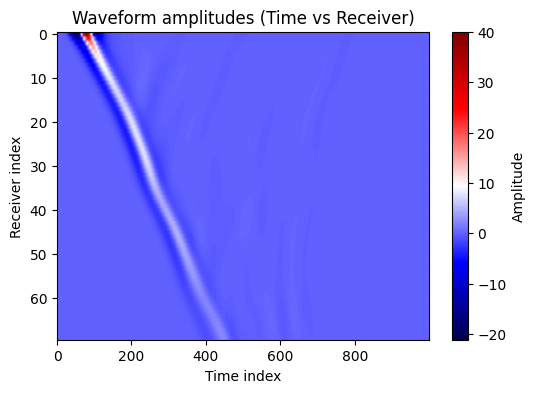

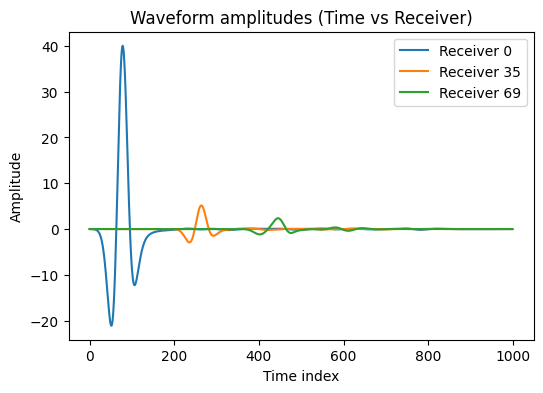

In [ ]:
import matplotlib.pyplot as plt

def viz_waveform_data(sample_seismic):
    shot0 = sample_seismic[0]

    plt.figure(figsize=(6, 4))
    plt.imshow(shot0.T, aspect='auto', cmap='seismic', origin='upper')
    plt.colorbar(label='Amplitude')
    plt.title('Waveform amplitudes (Time vs Receiver)')
    plt.xlabel('Time index')
    plt.ylabel('Receiver index')
    plt.show()

    plt.figure(figsize=(6, 4))
    for rec_idx in [0, 35, 69]:
        trace = shot0[:, rec_idx]
        plt.plot(trace, label=f'Receiver {rec_idx}')
    plt.legend()
    plt.title('Waveform amplitudes (Time vs Receiver)')
    plt.xlabel('Time index')
    plt.ylabel('Amplitude')
    plt.show()

viz_waveform_data(sample_seismic)

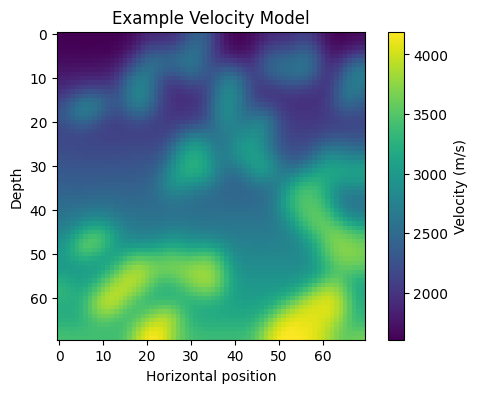

In [ ]:
def viz_velocity_model(sample_velocity):
    velocity_grid = sample_velocity.squeeze()

    plt.figure(figsize=(6, 4))
    plt.imshow(velocity_grid, cmap='viridis', origin='upper')
    plt.colorbar(label='Velocity (m/s)')
    plt.title('Example Velocity Model')
    plt.xlabel('Horizontal position')
    plt.ylabel('Depth')
    plt.show()

viz_velocity_model(sample_velocity)

Velocity stats - min: 1535.3988 max: 4419.9785 mean: 2714.6282


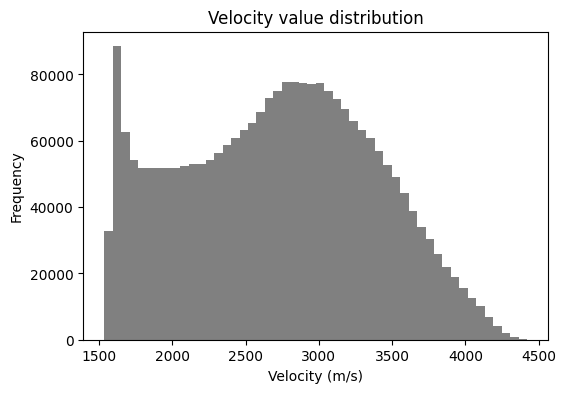

In [ ]:
def viz_velocity_value_distribution(model_batch):
    all_velocities = model_batch.reshape(-1)
    print('Velocity stats - min:', all_velocities.min(), 'max:', all_velocities.max(), 'mean:', all_velocities.mean())

    plt.figure(figsize=(6, 4))
    plt.hist(all_velocities, bins=50, color='gray')
    plt.title('Velocity value distribution')
    plt.xlabel('Velocity (m/s)')
    plt.ylabel('Frequency')
    plt.show()

viz_velocity_value_distribution(model_batch)

In [ ]:
sample_test_seismic = np.load('../input/waveform-inversion/test/fffe53ac66.npy')
print('Single sample test seismic data shape:', sample_test_seismic.shape)

Single sample test seismic data shape: (5, 1000, 70)


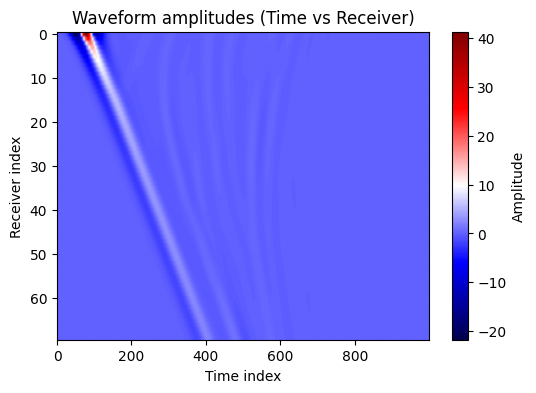

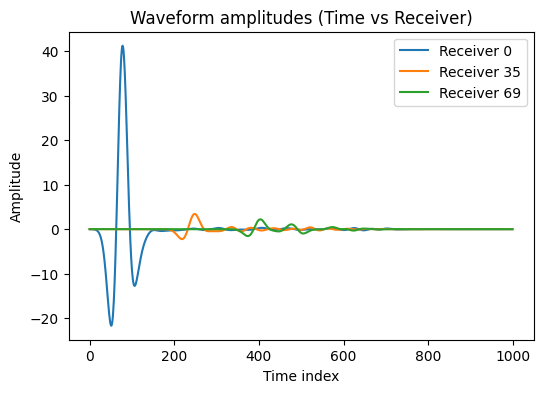

In [ ]:
viz_waveform_data(sample_test_seismic)